# Repaso de teoría de probabilidad

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://storage.needpix.com/rsynced_images/bayesian-2889576_1280.png" width="200px" height="180px" />

> La incertidumbre es un aspecto inevitable en la mayoría de aplicaciones; incluso, el debate si el mundo es determinista o estocástico es un debate abierto. Aún en el supuesto que el mundo siguiera un comportamiento determinista, las fuentes de incertidumbre están ahí, ya sea por una medición ruidosa, que los datos sean finitos, entre otros.

> En este sentido, es de vital importancia modelar esta incertidumbre dentro de los fenómenos de interés. Es por esto que los modelos que se consideran en este curso (y en gran parte de sus carreras profesionales) son probabilísticos.

> Por esa razón haremos un breve repaso de los conceptos que necesitaremos de teoría de probabilidad.

> **Objetivos:**
> - Repasar definiciones y resultados básicos de teoría de probabilidad.


> **Referencias:**
> 
> - Pattern Recognition and Machine Learning, by Christopher M. Bishop. Cap 1.2.
> - Bayesian Reasoning and Machine Learning by David Barber. Cap. 1.
> - Probabilistic Graphical Models: Principles and Techniques, by Daphne Koller and Nir Friedman. Cap. 2.


<p style="text-align:right;"> Imagen recuperada de: https://storage.needpix.com/rsynced_images/bayesian-2889576_1280.png.</p>

___

## 1. Introducción a probabilidad

La teoría de probabilidad nos dota de las bases centrales para cuantificar y manipular la incertidumbre. Esto es bastante importante, teniendo en cuenta que *aunque en casos simples (dados, rifas, moneda al aire) podemos razonar con la incertidumbre de manera intuitiva*, en escenarios más complejos (muchas variables interactuando entre sí) la intuición se queda corta y se hace necesaria una manera formal para extender la intuición.

Para introducir algunos conceptos básicos de probabilidad, usamos un ejemplo bastante sencillo (tomado de Pattern Recognition and Machine Learning, by Christopher M. Bishop):

Supongamos que tenemos dos cajas, una <font color=red>roja</font> y una <font color=blue>azul</font>. En la caja roja tenemos <font color=green>2 manzanas</font> y <font color=orange>6 naranjas</font>, y en la caja azul tenemos <font color=green>3 manzanas</font> y <font color=orange>1 naranja</font>.

In [1]:
from matplotlib import pyplot as plt

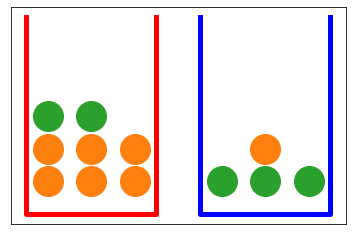

In [2]:
# Caja roja
plt.plot([0, 0, 3, 3], [3, 0, 0, 3], 'r', lw=5)
# 6 naranjas
plt.plot([0.5, 0.5, 1.5, 1.5, 2.5, 2.5],
         [0.5, 1., 0.5, 1., 0.5, 1.], 'o', ms=30, c='tab:orange')
# 2 manzanas
plt.plot([0.5, 1.5],
         [1.5, 1.5], 'o', ms=30, c='tab:green')
# Caja azul
plt.plot([4, 4, 7, 7], [3, 0, 0, 3], 'b', lw=5)
# 3 manzanas
plt.plot([4.5, 5.5, 6.5],
         [0.5, 0.5, 0.5], 'o', ms=30, c='tab:green')
# 1 naranjas
plt.plot([5.5],
         [1.], 'o', ms=30, c='tab:orange')
plt.xticks([])
plt.yticks([]);

Imaginemos que seleccionamos aleatoriamente una de las cajas, 40% de las veces seleccionamos la caja <font color=blue>azul</font> y el 60% de las veces seleccionamos la caja <font color=red>roja</font>, y de la caja seleccionada tomamos aleatoriamente una fruta, con igual probabilidad de seleccionar cualquier cualquier elemento dentro de la caja. Finalmente devolvemos la fruta a la caja original.

Definimos la identidad de la caja que seleccionamos como una **variable aleatoria** (V.A.), la cual denotamos como $C$, y puede tomar los valores <font color=red>r</font> y <font color=blue>a</font>.

Similarmente, definimos la identidad de la fruta seleccionada como una V.A., denotada por $F$, y que puede tomar los valores <font color=green>m</font> y <font color=orange>n</font>.

### ¿Cómo definimos la probabilidad de un evento?

Definiremos la probabilidad de un evento como **la fracción de veces que ocurre este evento entre la cantidad de repeticiones, cuando el número de repeticiones tiende a infinito**.

En este sentido, las probabilidades de seleccionar:

* <font color=red>La caja roja</font>: $p(C=r) = \frac{6}{10} = 0.6$
* <font color=blue>La caja azul azul</font>: $p(C=a) = \frac{4}{10} = 0.4$

A la luz de esta definición se intuyen dos reglas muy importantes:

1. Cualquier probabilidad debe ser un número en el intervalo $[0,1]$:
   
   $$
   0 \leq p(X=x) \leq 1.
   $$
   
2. Si los eventos son mutuamente excluyentes (la caja no puede ser roja y azul a la vez, por lo menos en este ejemplo), y son exhaustivos (la caja solo puede ser roja o azul), las probabilidades suman 1:

   $$
   \sum_{x} p(X=x) = 1.
   $$

Preguntas plausibles serían entonces:

- *¿Cuál es la probabilidad de seleccionar una manzana?*
- *Dado que elegimos una naranja, ¿Cuál es la probabilidad que la caja haya sido la azul?*

Notemos que estas probabilidades no las conocemos de antemano. Incluso, notemos que son probabilidades que involucran más de una variable. Sin embargo, tenemos la información necesaria para **inferir estas probabilidades**, no sin antes conocer la regla de la suma (**marginalización**), y la regla del producto (**regla de la cadena**).

Para obtener estas reglas en nuestro modo intuitivo de estudiar probabilidad, consideremos el caso más general en que tenemos dos V.A. $X$ y $Y$, las cuales pueden tomar los valores $x^i$ para $i=0,\dots,s$ y $y^j$ para $j=0,\dots,t$.

Supongamos que, de un total de $N$ repeticiones, 

- en $n_{ij}$ ocasiones obtuvimos $X=x^i$ y $Y=y^j$;
- en $c_{i}$ ocasiones obtuvimos $X=x^i$, sin importar el valor de $Y$;
- en $r_{j}$ ocasiones obtuvimos $Y=y^j$, sin importar el valor de $X$;

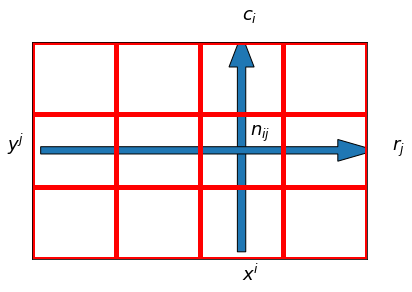

In [3]:
# Malla
plt.axhline(y=0, c='r', lw=5)
plt.axhline(y=1, c='r', lw=5)
plt.axhline(y=2, c='r', lw=5)
plt.axhline(y=3, c='r', lw=5)
plt.axvline(x=0, c='r', lw=5)
plt.axvline(x=1, c='r', lw=5)
plt.axvline(x=2, c='r', lw=5)
plt.axvline(x=3, c='r', lw=5)
plt.axvline(x=4, c='r', lw=5)
plt.text(-0.3, 1.5, '$y^j$', size=18)
plt.text(2.5, -0.3, '$x^i$', size=18)
plt.text(2.6, 1.7, '$n_{ij}$', size=18)
plt.text(2.5, 3.3, '$c_i$', size=18)
plt.arrow(2.5, 0.1, 0, 3., width=0.1, length_includes_head=True)
plt.text(4.3, 1.5, '$r_j$', size=18)
plt.arrow(0.1, 1.5, 4., 0, width=0.1, length_includes_head=True)
plt.axis([0, 4, 0, 3])
plt.xticks([])
plt.yticks([]);

De nuestra definición de probabilidad, tenemos que (suponiendo que $N \to \infty$):

1. La **probabilidad conjunta** de que $X=x^i$ y $Y=y^j$ es:

   $$
   p(X=x^i, Y=y^j) = \frac{n_{ij}}{N}.
   $$

2. La **probabilidad marginal** de que $X=x^i$ sin importar el valor de Y es;
   
   $$
   p(X=x^i) = \frac{c_{i}}{N}.
   $$
   
   Notemos que $c_i = \sum_j n_{ij}$, y en este sentido podemos establecer la regla de la suma (**marginalización**):
   
   $$
   p(X=x^i) = \sum_{j=0}^{t} p(X=x^i, Y=y^j).
   $$
   
   Similarmente, podemos definir la probabilidad marginal $p(Y=y^j)$.

3. Si en lugar de considerar todos los posibles repeticiones, consideramos solo aquellas para las que $X=x^i$, entonces la fracción de dichas repeticionesoara kas cuales $Y=y^j$, la conocemos como **probabilidad condicional** de $Y=y^j$ dado $X=x^i$, y la escribimos como:

   $$
   p(Y=y^j | X=x^i) = \frac{n_{ij}}{c_i}.
   $$

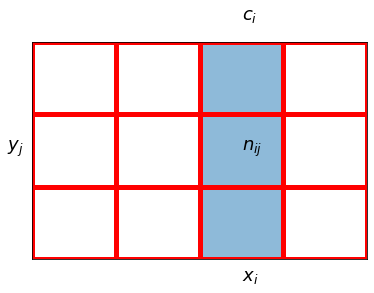

In [4]:
# Malla
plt.axhline(y=0, c='r', lw=5)
plt.axhline(y=1, c='r', lw=5)
plt.axhline(y=2, c='r', lw=5)
plt.axhline(y=3, c='r', lw=5)
plt.axvline(x=0, c='r', lw=5)
plt.axvline(x=1, c='r', lw=5)
plt.axvline(x=2, c='r', lw=5)
plt.axvline(x=3, c='r', lw=5)
plt.axvline(x=4, c='r', lw=5)
plt.text(-0.3, 1.5, '$y_j$', size=18)
plt.text(2.5, -0.3, '$x_i$', size=18)
plt.text(2.5, 1.5, '$n_{ij}$', size=18)
plt.text(2.5, 3.3, '$c_i$', size=18)
plt.arrow(2.5, 0., 0, 3., width=1, length_includes_head=False, alpha=0.5)
plt.axis([0, 4, 0, 3])
plt.xticks([])
plt.yticks([]);

Podemos observar que la probabilidad conjunta, la podemos escribir como:

$$
p(X=x^i, Y=y^j) = \frac{n_{ij}}{N} = \frac{n_{ij}}{c_i} \frac{c_{i}}{N} = p(Y=y^j | X=x^i) p(X=x^i),
$$

dando lugar a la regla del producto (**regla de la cadena**), y dando lugar a la definición de probabilidad condicional.

La **probabilidad condicional** de una V.A. $Y$ condicionada a que conocemos la V.A. $X$ (la probabilidad de $Y$ dado $X$), se define como:

$$
p(Y|X) = \frac{p(X, Y)}{p(X)},
$$

siempre que $p(X)>0$. Si $p(X)=0$, entonces $p(Y|X)$ no está definida.

La probabilidad condicional es una distribución de probabilidad válida, en el sentido que:

- $0 \leq p(Y|X) \leq 1$, y
- $\sum_{Y} p(Y|X) = 1$.

> **Observación en la notación.** Originalmente, escribimos $p(X=x)$ para referirnos al evento en que la variable aleatoria $X$ toma el valor $x$. Esta notación elimina "incertidumbre", pero es algo engorrosa. De manera que, en adelante, escribiremos simplemente $p(x)$ para referirnos a la probabilidad del evento $x$, y $p(X)$ para referirnos a la distribución de probabilidad de la V.A. $X$.

Dado que *la probabilidad conjunta es simétrica*, esto es $p(X, Y) = p(Y, X)$, de la definición de probabilidad condicional obtenemos **la regla de Bayes**:

$$
p(Y | X) = \frac{p(X | Y) p(Y)}{p(X)}.
$$

Finalmente, notemos que el denominador en la regla de Bayes se puede escribir (usando la marginalización y la regla de la cadena), como:

$$
p(X) = \sum_Y p(X | Y) p(Y),
$$

y se puede entender como una constante de normalización para asegurar que la probabilidad condicional sea **una distribución de probabilidad válida**.

> De manera que, a modo de resumen:
> 
>  - $0 \leq p(X) \leq 1$: Definición de probabilidad (i)
>  - $\sum_X p(X) = 1$: Definición de probabilidad (ii)
>  - $p(X) = \sum_{Y} p(X, Y)$: Marginalización
>  - $p(X, Y) = p(Y | X) p(X) = p(X | Y) p(Y)$: Regla de la cadena
>  - $p(X) = \sum_Y p(X | Y) p(Y)$: Probabilidad total
>
> La regla de la cadena, se puede extender al caso de $n$ V.A. como:
> 
> $$
  p(X_1, X_2, X_3, \dots, X_n) = p(X_1)p(X_2 | X_1) p(X_3 | X_2, X_1) \dots p(X_n | X_{n-1}, \dots, X_1).
  $$

### Ahora sí, respondamos las preguntas...

- *¿Cuál es la probabilidad de seleccionar una manzana?*
 
Primero que nada, las probabilidades que tenemos son:

$$
p(a) = 0.4 = \frac{2}{5}, \qquad p(r) = 0.6 = \frac{3}{5}, \qquad p(n | a) = \frac{1}{4}, \qquad p(m | a) = \frac{3}{4}, \qquad p(n | r) = \frac{3}{4}, \qquad p(m | r) = \frac{1}{4}.
$$

En este sentido, y usando la regla de la probabilidad total:

$$
p(m) = p(m | a) p(a) + p(m | r) p(r) = \frac{3}{4} \times \frac{2}{5} + \frac{1}{4} \times \frac{3}{5} = \frac{9}{20}.
$$

- *Dado que elegimos una naranja, ¿Cuál es la probabilidad que la caja haya sido la azul?*

Ahora, podemos usar la regla de Bayes:

$$
p(a | n) = \frac{p(n | a) p(a)}{p(n)}
$$

de donde ya conocemos $p(n | a)$ y la **previa** $p(a)$. Adicionalmente,

$$
p(n) = 1 - p(m) = \frac{11}{20}.
$$

Por lo cual:

$$
p(a | n) = \frac{1}{4} \times \frac{2}{5} \times \frac{20}{11} = \frac{2}{11}
$$

La respuesta a la segunda pregunta es bastante interesante, y demuestra el proceso fundamental de incorporar evidencia en un problema. 

- Notemos que, antes de saber qué fruta elegimos, **la probabilidad previa** de elegir la caja azul es $p(a) = \frac{4}{10}$.

- Ahora, al incorporar la evidencia de que la fruta que elegimos fue una naranja, observamos que **la probabilidad posterior** de elegir la caja azul disminuyó considerablemente a $p(a | n) = \frac{2}{11}$.

- Lo anterior es intuitivo, dado que la proporción de naranjas es significativamente más alta en la caja roja ($p(n | r) = \frac{3}{4}$) que en la caja azul ($p(n | a) = \frac{1}{4}$).

> Por esta bondad de añadir información de evidencia a nuestras inferencias es por lo que **la regla de Bayes es tan relevante.**

### Concepto de independencia

Seguramente, desde sus cursos básicos de probabilidad en la licenciatura recordarán lo siguiente:

> Dos V.A. $X$ y $Y$ son independiente si la distribución conjunta factoriza como el producto de marginales:
>  
> $$
  p(X, Y) = p(X) p(Y).
  $$
  
Ahora bien, la definición anterior es operativamente útil para establecer independencia, más no es para nada intuitiva en el sentido que no podemos relacionar la factorización con independencia. 

Incluso, hay casos que parecieran ser contraintuitivos, como el siguiente (Tomado de Bayesian Reasoning and Machine Learning by David Barber). Considere las V.A. binarias $X$ y $Y$, tales que:

$$
p(x^0, y^0) = 1, \qquad p(x^0, y^1) = 0, \qquad p(x^1, y^0) = 0, \qquad p(x^1, y^1) = 0.
$$

Podríamos decir intuitiva y **erróneamente** que $X$ y $Y$ son dependientes porque ambas son iguales, e iguales a $0$ con probabilidad 1 (con toda certeza). 

Sin embargo, al marginalizar obtenemos que:

$$
p(x^0) = 1, \qquad p(x^1) = 0, \qquad p(y^0) = 1, \qquad p(y^1)=0,
$$

y con esto es fácil ver que $p(X, Y) = p(X) p(Y)$ en todos los casos.

**¿Qué significa entonces independencia?**

Si movemos un poco las ecuaciones, y suponiendo que $p(X)>0$ y $p(Y)>0$, podemos ver que de la definición de probabilidad condicional:

$$
p(X | Y) = \frac{p(X, Y)}{p(Y)} = \frac{p(X) p(Y)}{p(Y)} = p(X)
$$

y similarmente

$$
p(Y | X) = P(Y).
$$

¿Y esto qué? Bueno, pues vemos que si dos variables son independientes, **la posterior y la previa son iguales**. O en términos más intuitivos, **la evidencia sobre una de las variables no aporta ninguna información acerca de la otra**.

En ese sentido, cuando hablamos de independencia en el contexto probabilístico, la pregunta que nos debemos hacer es **¿Conocer evidencia de una variable agrega información que no sepamos sobre otra?**

### Independencia condicional.

La independencia es una propiedad muy útil. Sin embargo, no es muy común encontrar eventos independientes cuando se analizan situaciones reales.

Por otra parte, una situación más común es encontrar eventos independientes dado un evento adicional.

Por ejemplo, supongamos que un estudiante aplica a dos prácticas profesionales en las empresas $A$ y $B$ al mismo tiempo.

Estas dos V.A., no son independientes en principio, pues saber que $A=a^1$ (el estudiante fue aceptado en la empresa $A$), aumenta la probabilidad de que $B=b^1$ y vice versa. 

Por otra parte, supongamos que las empresas obtienen tantos CVs de estudiantes, que deciden tomar la decisión de a quién aceptar con base en el promedio en la carrera, **únicamente**. 

Entonces si $X$ es la V.A. que representa el promedio de la carrera del estudiante, conocer $X$ **independiza** a las variables $A$ y $B$. Es decir

$$
P(A, B | X) = P(A| X) P(B| X),
$$

o equivalentemente,

$$
P(A | B, X) = P(A| X),
$$

o equivalentemente

$$
P(B | A, X) = P(B| X).
$$
___

## 2. Variables aleatorias continuas

Hasta ahora hemos hablado únicamente de **V.A. discretas**.

![dice](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c4/2-Dice-Icon.svg/600px-2-Dice-Icon.svg.png)

- Las variables aleatorias discretas son aquellas que pueden tomar un conjunto **finito** (o a lo sumo **contable** ~ $\mathbb{N}$) de valores.

- Un ejemplo de un fenómeno que podemos modelar con una VA discreta es la tirada de un dado.

- En este caso, la manera más conveniente de definir una distribución discreta de probabilidad es a través de la Función de Probabilidad (PMF - Probability Mass Function), la cual nos da el valor de la probabilidad para cada posible valor de la VA.

- Por ejemplo, consideramos la VA $X$, para la cual $\mathrm{Val}(X) = \{2, 5, 8\}$. Una función de probabilidad podría ser:
  $$
  P(X) = \left\{\begin{array}{cc }0.3 & X=2 \\ 0.3 & X=5 \\ 0.4 & X=8\end{array}\right.
  $$

In [36]:
# Importar scipy.stats
from scipy import stats
from matplotlib import pyplot as plt

In [37]:
# Definir listas de valores de X y probabilidades asociadas
xk = [2, 5, 8]
pk = [0.3, 0.3, 0.4]
X = stats.rv_discrete(name="X", values=(xk, pk))

In [38]:
X.expect()

5.300000000000001

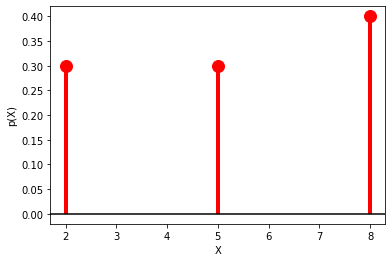

In [5]:
# Grafico
fig, ax = plt.subplots(1, 1)
ax.plot(xk, X.pmf(xk), 'ro', ms=12)
ax.vlines(xk, 0, X.pmf(xk), colors='r', lw=4)
ax.axhline(y=0, color='k')
ax.set_xlabel("X")
ax.set_ylabel("p(X)")
plt.show()

También podemos definir probabilidades respecto a **V.A. continuas**

![thermo](https://upload.wikimedia.org/wikipedia/commons/e/e0/Thermometer_-_by_Don.jpg)

- Las variables aleatorias continuas son aquellas que pueden tomar un valores en rangos continuos (subconjuntos de $\mathbb{R}$).

- Un ejemplo de un fenómeno que podemos modelar con una VA continua es la temperatura del presente día.

- En este caso, la manera más conveniente de definir una distribución continua de probabilidad es a través de la Función de Densidad de Probabilidad (PDF - Probability Density Function), la cual asigna un valor no negativo de probabilidad para cada valor real.

- Como ejemplo, tomamos la distribución normal $X \sim \mathcal{N}(\mu, \sigma^2)$:
  $$
  p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left\{-\frac{(x - \mu)^2}{2 \sigma^2}\right\}.
  $$

In [41]:
import numpy as np

In [42]:
# Definir una VA normal para la temperatura
mu, sigma = 20, 2
X = stats.norm(loc=mu, scale=sigma)

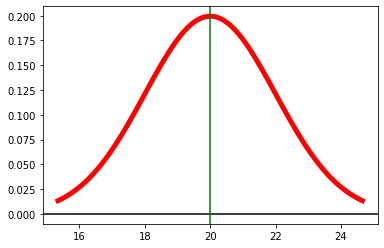

In [43]:
# Graficar
x = np.linspace(X.ppf(0.01), X.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, X.pdf(x), 'r-', lw=5, label='norm pdf')
ax.axhline(y=0, color='k')
ax.axvline(x=X.mean(), color='g')
plt.show()

In [44]:
samples = X.rvs(1000000)

In [45]:
samples.mean()

19.997870536856887

En el contexto de V.A. continuas no hablamos de función de probabilidad, sino de una **función de densidad de probabilidad p.d.f.** $p(x)$ que debe cumplir

$$
p(x) \geq 0
$$

y

$$
\int_{-\infty}^{\infty} p(x) \mathrm{d}x = 1.
$$

Notemos que en este caso la densidad puede ser mayor a $1$.

Con esto, la probabilidad de que $a \leq X \leq b$ es:

$$
p(a \leq X \leq b) = \int_{a}^{b} p(x) \mathrm{d}x
$$

Definimos también la **función de probabilidad acumulada c.d.f.** P(x) como:

$$
P(x) = \int_{-\infty}^{x} p(z) \mathrm{d}z,
$$

y respresenta la probabilidad de que $-\infty < X < x$. Por el teorema fundamental del cálculo $P'(x) = p(x)$.

In [35]:
# Verifiquemos lo anterior
X.cdf(np.inf)

1.0

> **Observaciones.** Todo lo que vimos en el caso discreto se extiende al caso continuo:
>
> - La definición de funciones de densisdad de probabilidad conjunta para múltiples V.A. continuas es bastante similar, haciendo uso de integrales múltiples.
>
> - La marginalización, la regla de la cadena, la regla de Bayes, aplican cambiando sumas por integrales:
    - $p(x) = \int_{-\infty}^{\infty} p(x, y) \mathrm{d}y$: Marginalización
    - $p(x, y) = p(y | x) p(x) = p(x | y) p(y)$: Regla de la cadena
    - $p(x) = \int_{-\infty}^{\infty} p(x | y) p(y) \mathrm{d}y$: Probabilidad total

## 3. Estadísticos: Valor esperado, varianza y covarianza

Una de las operaciones más importantes con probabilidades es la de encontrar promedios ponderados de funciones. El **valor esperado** de una función $f(x)$ respecto a una distribución $p(x)$, denotado por $\mathbb{E}_p[f]$, está dado por:

- Para una distribución discreta:
  
  $$
  \mathbb{E}_p[f] = \sum_x p(x)f(x).
  $$

- Para una distribución continua:
  
  $$
  \mathbb{E}_p[f] = \int p(x)f(x) \mathrm{d}x.
  $$

En cualquiera de los dos casos, si tenemos $N$ puntos i.i.d. muestreados de la distribución $p(x)$, podemos aproximar el valor esperado como el promedio simple de la función sobre esos puntos:

$$
\mathbb{E}_p[f] \approx \frac{1}{N} \sum_{i=1}^N f(x_i).
$$

Hay garantías teóricas que soportan este resultado (ver el siguiente [enlace](https://hal.archives-ouvertes.fr/hal-01216652/document) Proposition 1).

De hecho, la aproximación se vuelve una igualdad cuando $N\to\infty$.

El valor esperado es una *medida de tendencia central*, en el sentido que nos da un valor hacia el cual tiende a agruparse los datos. Una medida de la variabilidad al rededor del valor esperado es **la varianza**, denotada por $\mathrm{var}_p[f]$, que está definida por:

$$
\mathrm{var}_p[f] = \mathbb{E}_p[(f(x) - \mathbb{E}_p[f])^2] = \mathbb{E}_p[f(x)^2] - \mathbb{E}_p[f]^2.
$$

El operador de varianza se puede extender para analizar como se relacionan 2 V.A. $x$ y $y$. La **covarianza** está definida por:

$$
\mathrm{cov}[x, y] = \mathbb{E}_{x, y}[(x - \mathbb{E}[x]) (y - \mathbb{E}[y])] = \mathbb{E}_{x, y}[xy] - \mathbb{E}[x] \mathbb{E}[y].
$$

### Ejemplos: Distribuciones normales con diferentes medias, y varianzas

In [47]:
# Definir una VA normal
X = stats.norm(loc=20, scale=1)
Y = stats.norm(loc=30, scale=1)
Z = stats.norm(loc=30, scale=5)

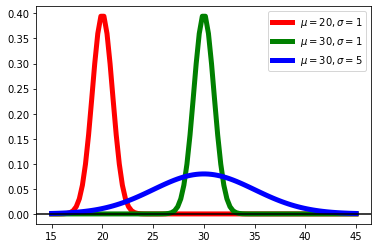

In [49]:
# Graficar
x = np.linspace(15, 45, 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, X.pdf(x), 'r-', lw=5, label=r'$\mu=20, \sigma=1$')
ax.plot(x, Y.pdf(x), 'g-', lw=5, label=r'$\mu=30, \sigma=1$')
ax.plot(x, Z.pdf(x), 'b-', lw=5, label=r'$\mu=30, \sigma=5$')
ax.axhline(y=0, color='k')
ax.legend()
plt.show()

## 4. Interpretaciones de la probabilidad

Antes de finalizar, discutamos la interpretación que podemos asignar a las distribuciones de probabilidad.

Durante esta clase, nos apegamos a la definición de probabilidad en términos de frecuencias relativas de fenómenos aleatorios que se pueden repetir un número arbitrario de veces. Esta interpretación de probabilidad se le conoce como **frecuentista** o clásica.

Con esta interpretación, las propiedades son intuitivas, y es fácil razonar cuando hablamos acerca de fenómenos físicos concretos: tirar una moneda, tirar un dado, juegos de cartas, entre otros. Sin embargo, esta interpretación no es para nada intuitiva cuando consideramos un evento como "lloverá mañana". En este caso resulta poco claro como definir la frecuencia de un evento como este.

En este tipo de situaciones es donde la interpretación **Bayesiana** de la probabilidad toma fuerza. En este contexto, la probabilidad de un evento cuantifica el grado de confianza que tenemos en que dicho evento va a ocurrir. En los casos extremos:
 - Si $p=1$, estamos seguros de que el evento ocurrirá;
 - si por el contrario $p=0$, consideramos que el evento es imposible.

Otros valores representan grados de confianza que yacen entre estos extremos.

Sin embargo, esto no nos dice nada acerca de lo que significan los números como tal.

Lo interesante, es que una construcción axiomática codificando propiedades de sentido común que asignamos a las probabilidades como grados de confianza, derivan en dos reglas fundamentales: **la marginalización y la regla de la cadena.**

# Anuncios parroquiales

### 1. Quiz la siguiente clase.
### 2. Tarea 1 para el martes.
### 3. [Lectura recomendada](https://medium.com/causal-data-science/if-correlation-doesnt-imply-causation-then-what-does-c74f20d26438).
### 4. Para los más visuales, les recomiendo este [material](https://seeing-theory.brown.edu/basic-probability/index.html)

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>